In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [23]:
data = pd.read_csv(r'C:\Users\Saurabh\Downloads\Datasets\income.csv',index_col=0,header=0)


In [24]:
data

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,,
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Checking Missing values

In [25]:

total = data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(32)

,Total,Percent
income,0,0.0
native-country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0
sex,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital-status,0,0.0


No Missing Values

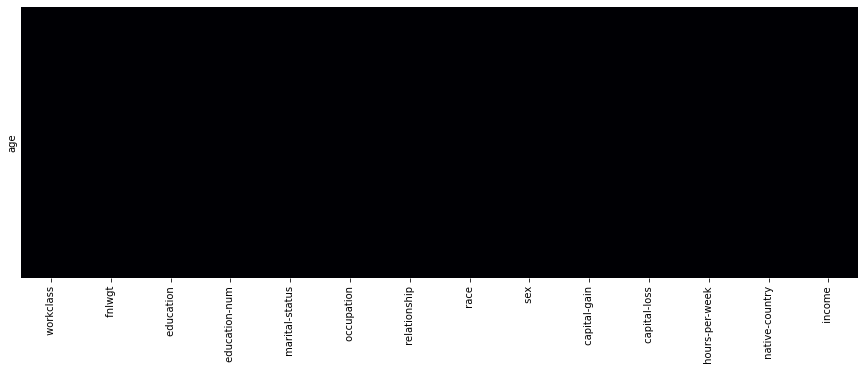

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar = False, yticklabels=False, cmap="magma" )

# Duplicate Records

In [27]:
data.duplicated().value_counts()

False    32494
True        67
dtype: int64

# Let us see how many Object type features are actually Categorical

In [28]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


 workclass          9
 education         16
 marital-status     7
 occupation        15
 relationship       6
 race               5
 sex                2
 native-country    42
 income             2
dtype: int64

In [29]:
num_col=[]

for x in data.columns[:]:
    if (data[x].dtype=='int64') | (data[x].dtype=='float64'):
        num_col.append(x)

print(num_col)

[' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


# Creating a custom function for confusion Matrix

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Converting the categorical variables into numerical ones

In [39]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country',
 ' income']

In [40]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])

In [41]:
data.head()

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,,
39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


# Dividing the Data into independent variables and dependant variable

In [42]:
X=data.values[:,0:-1]
Y=data.values[:,-1]

# Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[ 2.15057856 -1.06361075 -0.33543693 ... -0.21665953 -0.03542945
   0.29156857]
 [ 1.46373585 -1.008707   -0.33543693 ... -0.21665953 -2.22215312
   0.29156857]
 [ 0.09005041  0.2450785   0.18133163 ... -0.21665953 -0.03542945
   0.29156857]
 ...
 [ 0.09005041 -0.35877741  0.18133163 ... -0.21665953 -0.03542945
   0.29156857]
 [ 0.09005041  0.11095988  0.18133163 ... -0.21665953 -1.65522476
   0.29156857]
 [ 0.77689313  0.92989258  0.18133163 ... -0.21665953 -0.03542945
   0.29156857]]


# Building the model

In [44]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=10)

In [45]:
from sklearn.linear_model import LogisticRegression

#create a model
classifier=LogisticRegression()

#build train the model
classifier.fit(X_train,Y_train)

#predict using the model you created
Y_pred=classifier.predict(X_test)

#we areusing this for comparision
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[-0.05151958  0.02578987  0.06181768  0.85488515 -0.46752602  0.04145641
  -0.30235428  0.10949935  0.38537237  2.4498223   0.29265856  0.32354054
   0.02521679]]
[-1.46436596]


Confusion Matrix, Without Normalisation
[[4677  252]
 [ 909  675]]


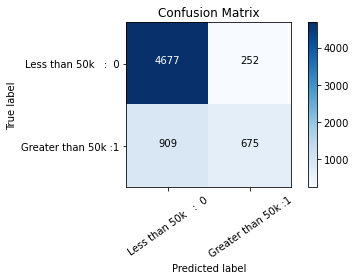

Classification report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4929
           1       0.73      0.43      0.54      1584

    accuracy                           0.82      6513
   macro avg       0.78      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513

Accuracy of the model: 0.8217411331183786


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test, Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Less than 50k   :  0','Greater than 50k :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)


# Decision Tree

In [53]:
#Running Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_features=8,random_state=0,)
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values 

Y_pred = model_DecisionTree.predict(X_test)


Confusion Matrix, Without Normalisation
[[4350  579]
 [ 624  960]]


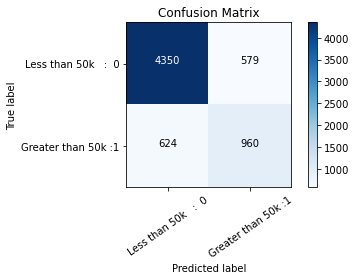

Classification report
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4929
           1       0.62      0.61      0.61      1584

    accuracy                           0.82      6513
   macro avg       0.75      0.74      0.75      6513
weighted avg       0.81      0.82      0.81      6513

Accuracy of the model: 0.8152924919391985


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

conf_matrix = confusion_matrix(Y_test, Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Less than 50k   :  0','Greater than 50k :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)


# Exporting the Machine

In [56]:
import pickle

In [58]:
#save the model to the disk
filename = 'dec_model.sav'
pickle.dump(model_DecisionTree, open(filename,'wb'))


In [59]:
#load the model from the disk
loaded_model = pickle.load(open(filename,'rb'))
Y_pred=loaded_model.predict(X_test)
Y_pred
#result =loaded_model.score(X_train,Y_train)
#print(result)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)